<a href="https://colab.research.google.com/github/shreypachauri3/Sampling-Methods/blob/main/SamplingMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment by 102103354

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score

<a id="1"><h1>Reading the data</h1></a>

In [ ]:
df= pd.read_csv('Creditcard_data.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


<a id="2"><h1>Checking the Class Distribution</h1></a>

<Axes: xlabel='Class', ylabel='count'>

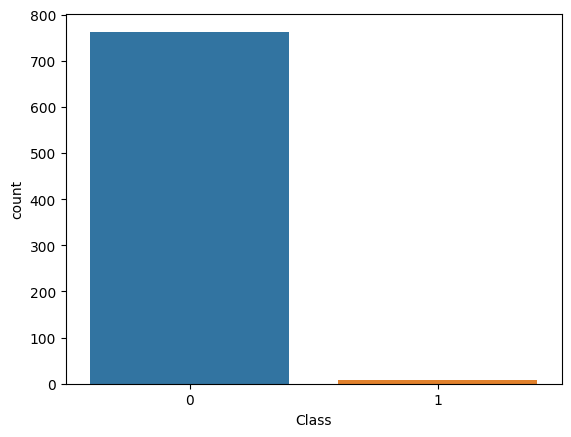

In [ ]:
sns.countplot(data= df, x= 'Class')

**It can be clearly observed that the dataset is unbalanced.**

In [ ]:
df['Class'].value_counts()

Class
0    763
1      9
Name: count, dtype: int64

<a id="3"><h1>Balancing the Dataset</h1></a>

<Axes: xlabel='Class', ylabel='count'>

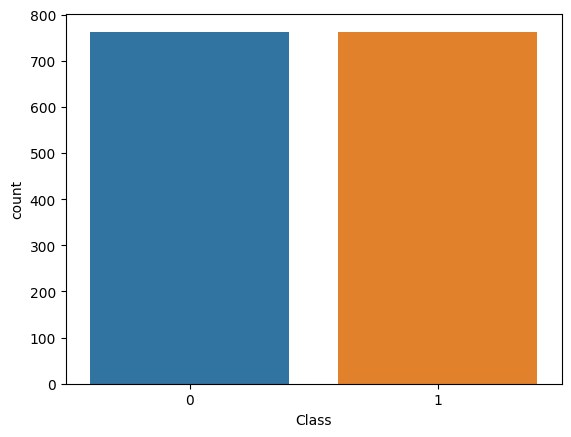

In [ ]:
X= df.drop('Class',axis=1)
y= df['Class']

ros= RandomOverSampler(random_state=42)

X_resampled, y_resampled= ros.fit_resample(X,y)

resampled_df= pd.concat([pd.DataFrame(X_resampled,columns= X.columns), pd.Series(y_resampled,name= 'Class')], axis=1)

sns.countplot(data= resampled_df, x= 'Class')

In [ ]:
resampled_df['Class'].value_counts()

Class
0    763
1    763
Name: count, dtype: int64

<a id="4"><h1>Applying Different Sampling Methods</h1></a>

<a id="5"><h3>Simple Random Sampling</h3>

In [ ]:
z= 1.96
p= 0.5
E= 0.05

In [ ]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E**2)))
sample_size

384

In [ ]:
random_sample= resampled_df.sample(n= sample_size, replace= False).reset_index(drop= True)

In [ ]:
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,52,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
1,256,-1.377245,0.714823,2.507513,0.865082,-0.290489,1.077328,0.032507,0.510946,0.717788,...,-0.341853,-0.606731,-0.099740,-0.009123,0.328379,-0.506683,-0.032235,0.139841,13.53,0
2,564,-0.203837,0.532747,-0.339857,-0.730934,2.728163,3.535882,0.263680,0.919169,-0.194501,...,-0.082087,-0.271636,-0.157778,0.989458,0.228821,-0.545156,0.058120,0.035573,12.90,0
3,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
4,250,-1.337375,1.109391,1.396223,0.038718,0.520267,-0.259157,0.806329,-0.016192,0.425314,...,-0.200431,-0.116354,-0.398652,-0.034692,0.444578,-0.489118,0.259927,0.065547,5.96,0


<a id="6"><h3>Systematic Sampling</h3></a>

In [ ]:
# no. of elements after which an element is selected
k= 5
#k= int(np.sqrt(len(resampled_df)))

In [ ]:
sample_size= len(resampled_df)//k
sample_size

305

In [ ]:
indices= np.arange(0,len(resampled_df),k)[:sample_size]
systematic_sample= resampled_df.loc[indices].reset_index(drop= True)

In [ ]:
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
4,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0


<a id="7"><h3>Stratified Sampling</h3></a>

In [ ]:
z= 1.96
p= 0.7
E= 0.01
S= 2

In [ ]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E/S)**2))
sample_size

1537

In [ ]:
len(resampled_df)

1526

In [ ]:
stratified_sample= resampled_df.groupby(by= 'Class', group_keys= False).apply(lambda x: x.sample(n= sample_size//2, replace= True)).reset_index(drop= True)

In [ ]:
stratified_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,323,-0.704133,0.341397,1.740027,-1.661595,0.872313,-0.007311,0.923083,-0.575939,0.447697,...,-0.206984,-0.321045,-0.334626,-0.813176,-0.265089,0.689043,-0.904113,-0.579831,0.77,0
1,145,1.122579,0.222573,0.481928,1.131375,-0.214947,-0.201283,-0.056556,0.087471,-0.250570,...,0.163223,0.492048,-0.068450,0.233485,0.532600,-0.281097,0.028326,0.010990,9.90,0
2,288,1.268069,0.285832,-0.147276,1.047742,0.672115,0.656656,0.138315,-0.010785,0.158271,...,-0.177627,-0.189526,-0.251549,-1.266236,0.901899,-0.230845,0.048271,0.004764,6.54,0
3,406,-0.814054,1.538222,1.115690,-0.051667,0.092334,-1.013398,0.748851,-0.124814,-0.207407,...,-0.311452,-0.627544,-0.016469,0.363403,-0.014631,0.076914,0.467478,0.228123,1.98,0
4,107,1.175125,0.661341,-0.477476,1.102542,0.543328,-0.246785,0.165234,0.027018,-0.423144,...,-0.003071,0.093738,-0.154355,-0.425097,0.652435,-0.296802,0.051425,0.041876,1.00,0


**We can perform stratified sampling by another simpler approach while also creating a test set on which we will compute the accuracy score of each model.**

In [ ]:
train_stratified_sample, test_stratified_sample= train_test_split(resampled_df, test_size= 0.3, stratify= resampled_df['Class'])

In [ ]:
train_stratified_sample= train_stratified_sample.reset_index(drop= True)
test_stratified_sample= test_stratified_sample.reset_index(drop= True)

In [ ]:
train_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
1,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
2,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
3,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
4,373,1.149246,0.018358,0.430440,0.537503,-0.430754,-0.394699,-0.151398,0.135031,-0.004959,...,-0.124932,-0.449760,0.135781,0.185130,0.129062,0.177780,-0.034565,0.001487,10.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1064,541,-0.623525,0.176955,2.565715,1.544280,0.109686,0.055218,0.259801,-0.192566,-0.320106,...,0.387800,1.408297,0.019451,0.545551,-1.357580,-0.332164,-0.138540,-0.200151,67.10,0
1065,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1066,147,0.912979,-0.653000,0.298165,0.209546,-0.197231,0.971100,-0.449461,0.281896,0.262493,...,0.089258,-0.077306,-0.237707,-1.301415,0.179599,0.469956,-0.024739,0.028338,170.43,0


In [ ]:
test_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
1,292,-0.401849,1.015111,1.302010,-0.042208,0.055806,-0.683093,0.561144,0.106408,-0.570880,...,-0.215930,-0.623168,-0.013880,0.262950,-0.207349,0.056362,0.237041,0.087456,4.45,0
2,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
3,289,-1.782116,-0.326079,2.282092,-0.381814,1.061290,2.666355,0.311426,0.364125,1.080382,...,-0.316547,0.480398,0.193991,-1.867208,0.145658,0.491213,0.248133,-0.504045,74.47,0
4,581,1.153758,0.132273,0.382969,1.405063,-0.224287,-0.197295,0.020653,0.029260,0.412254,...,-0.107809,-0.125231,-0.057041,0.073082,0.633977,-0.310685,0.033590,0.015250,13.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
454,204,0.860652,-0.247375,0.754082,1.185492,-0.486174,0.241013,-0.197776,0.136015,-0.138920,...,0.285398,0.612468,-0.175761,0.047503,0.378592,-0.305092,0.037626,0.043644,137.30,0
455,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
456,346,-0.928193,0.671758,1.924616,0.273755,1.041108,0.136930,0.361483,0.143337,-0.682134,...,-0.115034,-0.424494,-0.194916,-0.783830,0.310156,-0.512783,0.084721,0.082173,5.00,0


In [ ]:
X_test= test_stratified_sample.drop('Class',axis=1)
y_test= test_stratified_sample['Class']

<a id="8"><h3>Cluster Sampling</h3></a>

In [ ]:
z= 1.96
p= 0.5
E= 0.05
C= 50

In [ ]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E/C)**2))
sample_size

In [ ]:
clusters= [0,1]
sample_size= 500
cluster_sample= pd.DataFrame()

for cluster in clusters:
    cluster_df= resampled_df[resampled_df['Class']==cluster]
    sample= cluster_df.sample(n= sample_size)
    cluster_sample= pd.concat([cluster_sample,sample])

In [ ]:
cluster_sample= cluster_sample.reset_index(drop= True)

In [ ]:
cluster_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,59,0.921024,-0.162447,-0.094331,0.474084,-0.021486,-0.397506,0.482643,-0.117496,-0.577836,...,-0.209381,-0.930107,0.028510,0.032682,0.155130,0.133250,-0.073534,0.022349,149.90,0
1,78,-1.760402,0.221924,0.579950,-1.413194,0.804876,-0.353324,0.869656,-0.031477,0.317739,...,-0.403692,-0.478169,0.261138,-0.903295,-0.130709,0.713907,-0.028134,-0.410877,62.92,0
2,154,1.190844,-0.608427,0.069097,-0.493509,-0.944775,-1.390857,0.047659,-0.467884,-1.248877,...,0.262280,0.489143,-0.186645,0.797721,0.630575,-0.183914,-0.029302,0.033508,127.69,0
3,14,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
4,140,0.693503,-1.134232,0.782844,-0.592996,-1.421803,-0.487531,-0.272321,-0.029104,1.353066,...,0.238845,0.380749,-0.270755,0.595487,0.392157,-0.733622,0.051230,0.074614,257.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
996,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
997,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
998,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1


<a id="9"><h3>Bootstrap Sampling</h3></a>

In [ ]:
num_bootstrap_samples = 1

for _ in range(num_bootstrap_samples):
    bootstrap_sample = resampled_df.sample(n=len(resampled_df), replace=True)

In [ ]:
bootstrap_sample= bootstrap_sample.reset_index(drop= True)

In [ ]:
bootstrap_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,572,-0.772941,0.815404,1.365536,-0.519298,1.034867,1.658806,0.436415,0.505824,-0.269480,...,-0.164132,-0.067183,0.030243,-1.380113,-0.477699,0.180325,0.275730,-0.068830,8.98,0
1,241,1.181572,0.241408,0.024537,0.885832,-0.121471,-0.275552,-0.142414,0.031283,0.253328,...,-0.143114,-0.172136,-0.156844,-0.045282,0.583795,0.412511,0.001454,0.030863,12.31,0
2,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
3,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
4,84,1.119272,-0.669639,0.803807,-0.651693,-1.395666,-0.800698,-0.601605,0.014390,2.019905,...,0.163687,0.546516,-0.176836,0.402556,0.563402,-0.534236,0.075047,0.042001,67.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,297,-1.148038,0.367626,2.769717,-0.356562,-0.268456,0.323423,-0.108718,0.452755,0.166990,...,0.063334,0.168210,-0.194521,0.228655,0.107744,0.222331,-0.109160,0.089767,6.20,0
1522,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1523,322,1.202007,0.108213,0.591724,0.566079,-0.641573,-0.816974,-0.127403,0.004375,-0.026148,...,-0.207683,-0.703844,0.165350,0.493736,0.114822,0.068947,-0.041350,0.008041,1.79,0
1524,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1


<a id="10"><h1>Training on Different Models</h1></a>

In [ ]:
lr_model= LogisticRegression(max_iter= 10000, solver= 'sag')
knn_model= KNeighborsClassifier(n_neighbors= 3)
rf_model= RandomForestClassifier()
dt_model= DecisionTreeClassifier()
nb_model= GaussianNB()

In [ ]:
models= [lr_model,knn_model,rf_model,dt_model,nb_model]
model_names= ['Logistic Regression','KNN','Random Forest','Decision Tree','Naive Bayes']

In [ ]:
samples= [random_sample, systematic_sample, train_stratified_sample, cluster_sample, bootstrap_sample]
sample_names= ['Simple Random Sample', 'Systematic Sample', 'Stratified Sample', 'Cluster Sample', 'Bootstrap Sample']

In [ ]:
test_samples= []

In [ ]:
for sample in samples:
    scaler= StandardScaler()
    X_train= scaler.fit_transform(sample.drop('Class',axis=1))
    X_train= pd.DataFrame(X_train, columns= df.columns[:-1])
    sample= pd.concat([X_train,sample['Class']],axis=1)
    X_test= scaler.fit_transform(X_test)
    X_test= pd.DataFrame(X_test, columns= df.columns[:-1])
    test_samples.append(X_test)

In [ ]:
accuracy_table= pd.DataFrame(index= model_names, columns= sample_names)

for i,model in enumerate(models):
    for j,sample in enumerate(samples):
        model.fit(sample.drop('Class',axis=1), sample['Class'])
        pred= model.predict(test_samples[j])
        accuracy_table.loc[model_names[i], sample_names[j]]= accuracy_score(y_test, pred)

In [ ]:
accuracy_table

,Simple Random Sample,Systematic Sample,Stratified Sample,Cluster Sample,Bootstrap Sample
Linear Regression,0.796943,0.641921,0.740175,0.650655,0.737991
KNN,0.5,0.5,0.5,0.504367,0.427948
Random Forest,0.5,0.565502,0.5,0.5,0.5
Decision Tree,0.532751,0.604803,0.606987,0.60917,0.543668
Naive Bayes,0.565502,0.572052,0.578603,0.576419,0.578603


# <h1>Assignment by Shrey Pachauri (102103354)</h1>